In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import read_QE_band as readband

# CsPbBr$_3$

In [2]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')

In [3]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [4]:
indices = list(bandas['k'])
len(indices)

101

Band Gap = 1.6845999999999997 eV


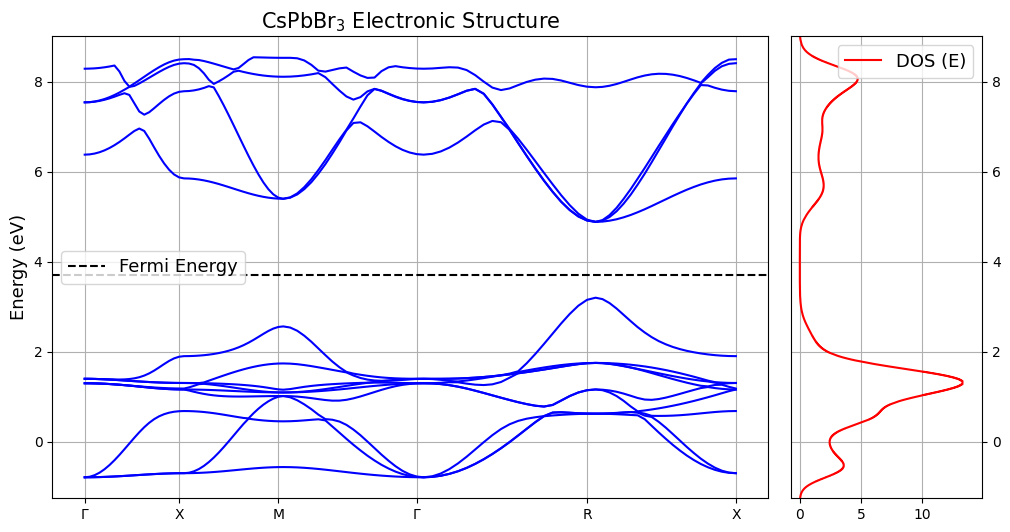

In [5]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[39], indices[59], indices[79], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e21'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:
bg = min(bandas['e22'])- max(bandas['e21'])
print('Band Gap =', bg, 'eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 15)
ax.axhline(3.7060, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

# Cs$_3$Bi$_2$Br$_9$

In [6]:
bandas = readband(r'Cs3Bi2Br9/band-cs3bi2br9.gnu')
dos = pd.read_csv(r'Cs3Bi2Br9/dos_Cs3Bi2Br9.txt', sep = ' ')

In [7]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

141

Band Gap = 2.536 eV


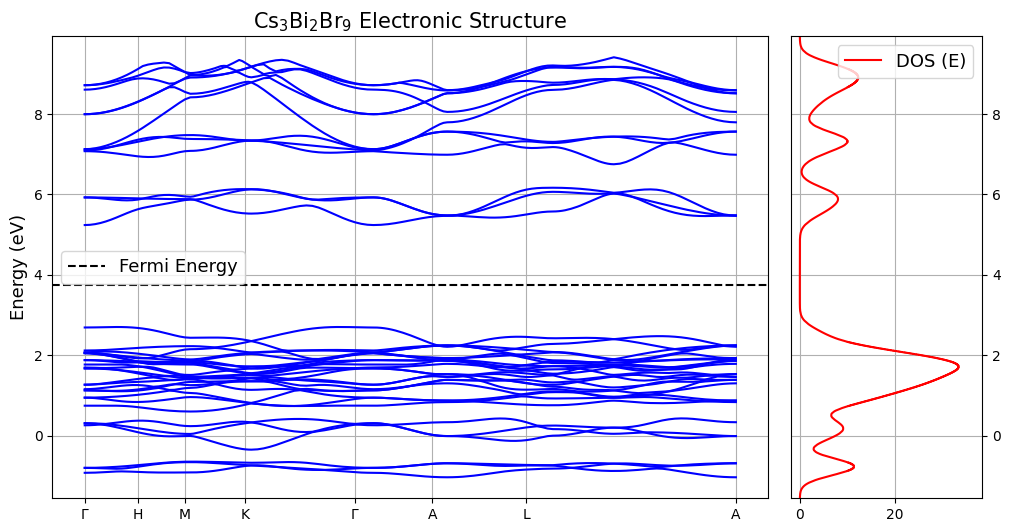

In [8]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57], indices[76], indices[95], indices[10],indices[-1]]  

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(33,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
bg = min(bandas['e60'])- max(bandas['e59'])
print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M","K", "$\Gamma$", 'A', 'L', 'H', 'A'])
ax.grid('--')
ax.set_title(r'Cs$_3$Bi$_2$Br$_9$ Electronic Structure', fontsize = 15)
ax.axhline(3.7572, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig(r'Cs3Bi2Br9/banda_Cs3Bi2Br9.png', dpi = 200)